#Import Libraries

In [1]:
import keras
import numpy as np
from keras.preprocessing import image
import google.colab
from keras.applications import imagenet_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import tensorflow as tf
import google.colab
import numpy as np
import os

Using TensorFlow backend.


#Mount Google Drive
Do this for access the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [4]:
ls

 876773_720.jpg                               mobilenet.ipynb
'ANN & CNN.ipynb'                             modelfix.pkl
 Bismillah.ipynb                             'Non-Teknikal (ADRO).ipynb'
 CNN.ipynb                                   'Non-Teknikal (BBRI2).ipynb'
'CNN TUBES.ipynb'                             Non-Teknikal.ipynb
'Content-Based Recommendation System.ipynb'   Sapi/
 E01.jpg                                      sentiment.ipynb
 FPA.ipynb                                   'Teknikal (KLBF).ipynb'
 ilustrasi-pesawat-lion-air.jpg               Untitled0.ipynb
 Jenis_Kendaraan/                             Untitled11.ipynb
 Kendaraan/


#Load Dataset

In [5]:
print("[INFO] : Waiting ... ")
imagePaths = paths.list_images("Kendaraan")
data = []
labels = []

[INFO] : Waiting ... 


In [0]:
#Resize the pixel of dataset to 224,224/255.0
for jalurgambar in imagePaths:
  image = Image.open(jalurgambar)
  image = np.array(image.resize((224,224))) / 255.0
  data.append(image)

#Labelling Dataset
  label = jalurgambar.split(os.path.sep)[-2]
  labels.append(label)

In [7]:
print(len(labels))

56


#Assign Unique Value to The Labels

In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

#Split Dataset

In [0]:
(x_train, x_test, y_train, y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.30)

#Transfer Learning (TH-HUB - Mobilenetv2)

In [0]:
import tensorflow_hub as hub
import tensorflow.keras.layers as layers

IMAGE_SHAPE = (224, 224, 3)

feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=IMAGE_SHAPE,
                                        trainable=False)

model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1792)              4363712   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5379      
Total params: 4,369,091
Trainable params: 5,379
Non-trainable params: 4,363,712
_________________________________________________________________


In [15]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=8, steps_per_epoch=1)

Epoch 1/20
1/1 [==============================] - 1s 689ms/step - loss: 0.9205 - acc: 0.5000 - val_loss: 1.0765 - val_acc: 0.4706
Epoch 2/20
1/1 [==============================] - 0s 70ms/step - loss: 1.2096 - acc: 0.2500 - val_loss: 0.9614 - val_acc: 0.5294
Epoch 3/20
1/1 [==============================] - 0s 65ms/step - loss: 1.5109 - acc: 0.2500 - val_loss: 0.8345 - val_acc: 0.5294
Epoch 4/20
1/1 [==============================] - 0s 64ms/step - loss: 0.5298 - acc: 0.8750 - val_loss: 0.7230 - val_acc: 0.5882
Epoch 5/20
1/1 [==============================] - 0s 64ms/step - loss: 0.6742 - acc: 0.7143 - val_loss: 0.6334 - val_acc: 0.7647
Epoch 6/20
1/1 [==============================] - 0s 65ms/step - loss: 0.3831 - acc: 0.8750 - val_loss: 0.5650 - val_acc: 0.7647
Epoch 7/20
1/1 [==============================] - 0s 73ms/step - loss: 0.4608 - acc: 0.7500 - val_loss: 0.4893 - val_acc: 0.8824
Epoch 8/20
1/1 [==============================] - 0s 64ms/step - loss: 0.4956 - acc: 0.8750 - va

#Model Evaluation

In [0]:
predictions = model.predict(x_test, batch_size=8)

In [17]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

       Mobil       1.00      1.00      1.00         5
       Motor       1.00      1.00      1.00         6
     Pesawat       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



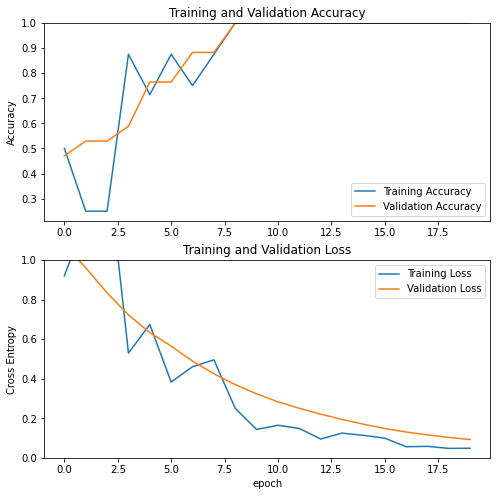

In [18]:
import matplotlib.pyplot as plt

acc = H.history['acc']
val_acc = H.history['val_acc']

loss = H.history['loss']
val_loss = H.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#Test Data

In [0]:
fl = google.colab.files.upload()

Saving ilustrasi-pesawat-lion-air.jpg to ilustrasi-pesawat-lion-air.jpg


In [0]:
next(iter(fl))

'ilustrasi-pesawat-lion-air.jpg'

In [0]:
img = image.load_img(open(next(iter(fl)), 'rb'), target_size=(224,224))

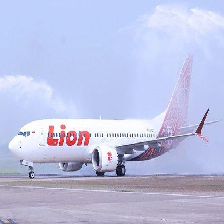

In [0]:
img

In [0]:
imgarr=image.img_to_array(img)

In [0]:
imgarr.shape

(224, 224, 3)

In [0]:
imgarr = imgarr.reshape(1,224,224,3)
imgarr=keras.applications.mobilenet.preprocess_input(imgarr)

In [0]:
y_pred=model.predict(imgarr)
print("Predicted")
print(y_pred, lb.classes_)

Predicted
[[0.02036021 0.00352952 0.9761103 ]] ['Mobil' 'Motor' 'Pesawat']
